<a href="https://colab.research.google.com/github/anchaldubey/2201CS15_CS502_Assignment1/blob/main/2201CS15_CS502_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin (1).data


In [121]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [109]:
raw_data = pd.read_csv("breast-cancer-wisconsin.data",
                       names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape",
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"])
print(raw_data.shape)
raw_data.head()

(699, 11)


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [110]:
# Drop ID and Class columns
raw_data2 = raw_data.drop(['id','Class'], axis=1)

# Converting the 'Bare Nuclei' column to numeric values
raw_data2['Bare Nuclei'] = pd.to_numeric(raw_data2['Bare Nuclei'], errors='coerce')

# Filling the NaN values in the 'Bare Nuclei' column with the mean of the column to handle missing data
raw_data2['Bare Nuclei'].fillna(raw_data2['Bare Nuclei'].mean(), inplace=True)

print(raw_data2.dtypes)

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
dtype: object


/tmp/ipython-input-4006073393.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data2['Bare Nuclei'].fillna(raw_data2['Bare Nuclei'].mean(), inplace=True)


In [111]:
# Normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# Normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
norm_data = (raw_data2 - np.mean(raw_data2)) / np.std(raw_data2)
norm_data.head()

# Map class variable to 1's (malignant) and 0's (benign)
norm_data['Class'] = raw_data['Class'].map({4:1, 2:0})
norm_data.head()

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.662572,-0.700397,-0.719144,-0.748494,-0.513263,-0.593371,-0.055694,-0.699898,-1.246144,0
1,0.662572,0.283443,0.291030,0.653374,1.746404,1.907133,-0.055694,-0.372185,-1.246144,0
2,-0.048229,-0.700397,-0.719144,-0.748494,-0.513263,-0.315537,-0.055694,-0.699898,-1.246144,0
3,1.017973,1.595230,1.637928,-0.748494,-0.061329,0.240131,-0.055694,1.266381,-1.246144,0
4,0.307171,-0.700397,-0.719144,-0.047560,-0.513263,-0.593371,-0.055694,-0.699898,-1.246144,0


In [112]:
# Divide normalized data into features and labels
features = norm_data.drop('Class', axis=1)
labels = norm_data['Class']
print(labels.head())
features.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.662572,-0.700397,-0.719144,-0.748494,-0.513263,-0.593371,-0.055694,-0.699898,-1.246144
1,0.662572,0.283443,0.291030,0.653374,1.746404,1.907133,-0.055694,-0.372185,-1.246144
2,-0.048229,-0.700397,-0.719144,-0.748494,-0.513263,-0.315537,-0.055694,-0.699898,-1.246144
3,1.017973,1.595230,1.637928,-0.748494,-0.061329,0.240131,-0.055694,1.266381,-1.246144
4,0.307171,-0.700397,-0.719144,-0.047560,-0.513263,-0.593371,-0.055694,-0.699898,-1.246144


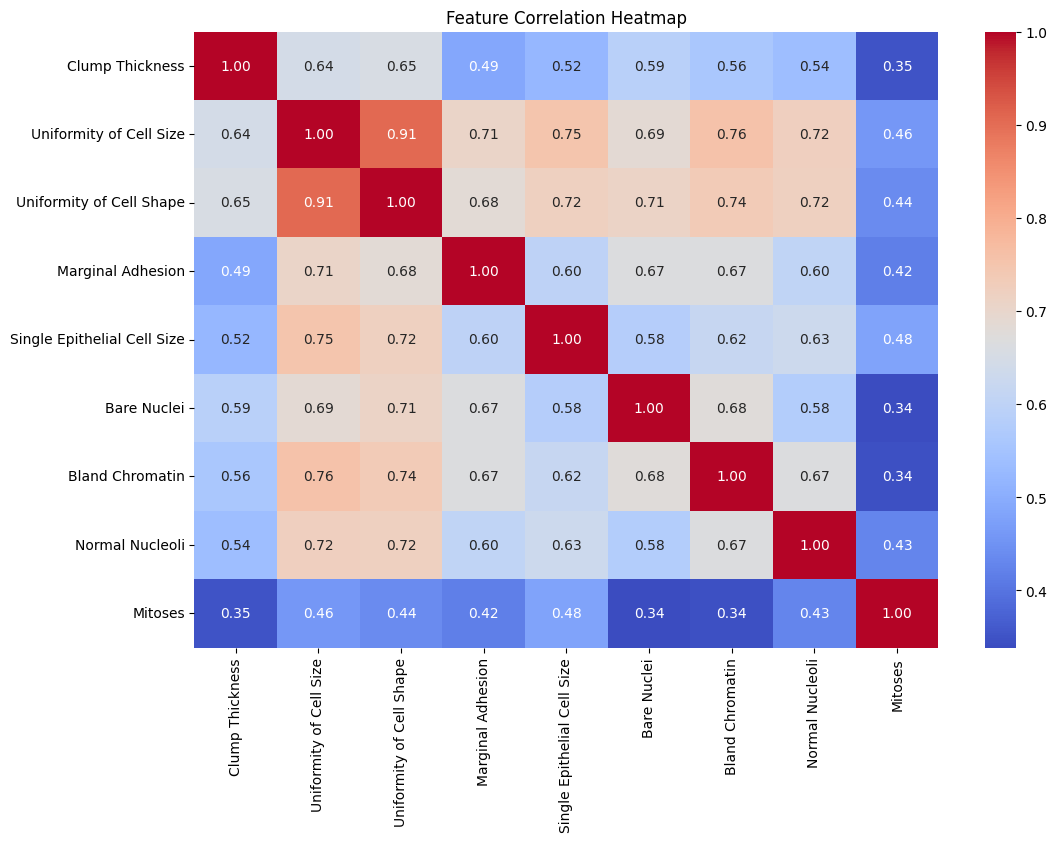

In [122]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = raw_data2.corr()  # Correlation matrix of numeric features
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [113]:
# Split data into training and test features and labels using 30% of data as validation/test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(489, 9) (489,)
(210, 9) (210,)


When using a SVM with a polynomial kernel there are two hyperparameters to tune. The value of C and the degree of the polynomial, d. This function, svc_param_selection will find the optimal pair of (C, degree) that gives the best results on a test set using sklearn's GridSearchCV (cross validation) method.

In [118]:
# svc_param_selection optimizes combination of degree and C hyperparameters using an SVC with a polynomial kernel

def svc_param_selection(X, y, nfolds):
    # The slack penalty hyperparameter
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    # Degrees of polynomial kernel of svc
    degrees = [1, 2, 3, 4, 5]
    # Initialize the paremeter grid as dictionary
    param_grid = {'C': Cs, 'degree' : degrees}
    # Initialize search for best parameters using input nfold cross validation
    search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    # Fit the search object to input training data
    search.fit(X, y)
    # Return the best parameters
    search.best_params_
    return search.best_params_

In [119]:
svc_param_selection(X_train, y_train, 10)

{'C': 0.1, 'degree': 1}

In [120]:
# Create and train a polynomial kernel SVM classifier with C=0.1 and degree=1
final_svc_poly = svm.SVC(C=.1, degree=1, kernel='poly', random_state=42)
final_svc_poly.fit(X_train, y_train)

# Evaluate the trained SVM model on the test set and return the accuracy score
final_svc_poly.score(X_test, y_test)

0.9619047619047619

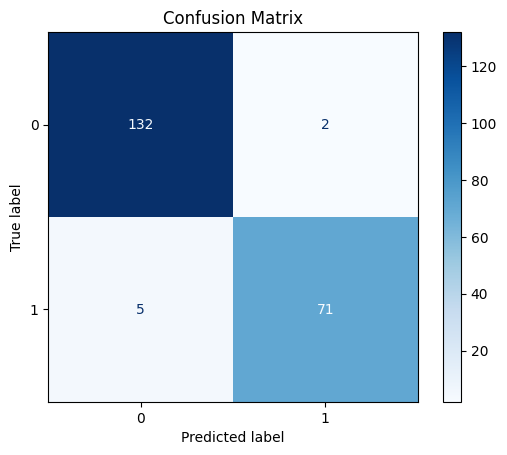

In [117]:
# Confusion Matrix
confusionMatrix = confusion_matrix(y_test, svc_rbf.predict(X_test))
confusionMatrix
disp = ConfusionMatrixDisplay(confusionMatrix, display_labels=[0, 1])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()